In [7]:
from SimEx.Parameters.IonMatterInteractorParameters import IonMatterInteractorParameters
from SimEx.Calculators.TNSAIonMatterInteractor import TNSAIonMatterInteractor

Define the "parameters" object:
List of parameters: energy_bin, neutron_weight, ibeam_radius, target_length, target_density,
                    xsec_file, ion_name

In [8]:
myparams = IonMatterInteractorParameters(ion_name='proton', neutron_weight=1.e4)
myparams.xsec_file = 'D_D_-_3He_n.txt'

Create the object doing the job:

In [9]:
mysource = TNSAIonMatterInteractor(parameters=myparams, input_path='Data/0010.sdf', 
                                   output_path='Data/NeutronData.h5')

Another way to do it:

In [2]:
paramsdict={'target_density':2.e28, 'ion_name':'proton', 'xsec_file':'D_D_-_3He_n.txt'}

In [3]:
mysource = TNSAIonMatterInteractor(parameters=paramsdict, input_path='Data/0010.sdf', 
                                   output_path='Data/NeutronData.h5')

Run the "engine":

In [10]:
mysource.backengine()

Number of energy bins: 148
Number of neutron macroparticles: 1001


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

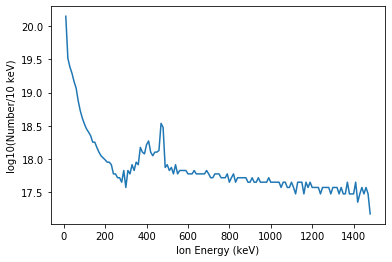

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.plot(np.divide(mysource.binedges, 1000), np.log10(mysource.counts))
plt.xlabel("Ion Energy (keV)")
plt.ylabel("log10(Number/10 keV)")
plt.show()

Check the result by plotting the Neutron distribution in velocity space:

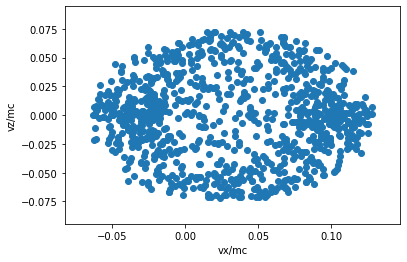

In [16]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.scatter(mysource.data[3]/3.e8, mysource.data[5]/3.e8)
plt.xlabel("vx/mc")
plt.ylabel("vz/mc")
plt.show()

In [8]:
mysource.saveH5()

Default settings:
basePath:  /data/%T/
openPMD version:  1.1.0
iteration format:  /data/%T/
